
# Búsqueda semántica y Clustering con *embeddings* (TF‑IDF)  
**Objetivo:** Mostrar un flujo completo y simple para búsqueda semántica y clustering sin depender de APIs externas.

---

### ¿Qué incluye?
- Generación de *embeddings* ligeros con **TF‑IDF**
- **Búsqueda semántica** por similitud coseno
- **Clustering** con **KMeans**
- **Proyección 2D** con PCA para visualización
- Términos representativos por clúster




## 1) imports



In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



## 2) Dataset de ejemplo
Es posible reemplazar o ampliar los documentos en docs. Cada elemento es (título, texto).


In [ ]:

docs = [
    ("Calentamiento global acelera el derretimiento de glaciares",
     "El aumento de la temperatura global está provocando el derretimiento acelerado de glaciares y cambios en patrones climáticos."),
    ("Nuevas políticas climáticas en la Unión Europea",
     "La UE anuncia políticas de reducción de emisiones de CO2 y planes de transición energética hacia renovables."),
    ("Energía solar supera récords de producción",
     "La capacidad instalada de paneles solares crece y supera récords históricos de producción eléctrica."),
    ("Impacto de la deforestación en la biodiversidad",
     "La deforestación reduce hábitats críticos, afectando especies y servicios ecosistémicos esenciales."),
    ("Final de fútbol: victoria con remontada épica",
     "El equipo local logró una remontada en los últimos minutos con dos goles consecutivos."),
    ("Análisis táctico del partido de semifinal",
     "La presión alta y el contraataque fueron claves para controlar el ritmo del encuentro."),
    ("Nuevo teléfono con cámara avanzada y IA",
     "El smartphone integra fotografía computacional y modelos de inteligencia artificial para mejorar las imágenes."),
    ("Comparativa de portátiles para desarrollo de software",
     "Se evaluaron CPU, RAM y autonomía en distintos modelos de portátiles para programadores."),
    ("Lanzamiento de framework de aprendizaje automático",
     "Un nuevo framework facilita el entrenamiento distribuido y la optimización de modelos."),
    ("Cyberseguridad: aumento de ataques de ransomware",
     "Empresas reportan más incidentes, reforzando medidas de backup y respuesta a incidentes."),
    ("Estudio sobre dieta mediterránea y salud cardiovascular",
     "La dieta mediterránea se asocia a menor riesgo de eventos cardiovasculares en estudios observacionales."),
    ("Ejercicio físico y bienestar mental",
     "Sesiones regulares de actividad física se relacionan con mejoras en el estado de ánimo y el sueño."),
    ("Vacuna contra nueva variante muestra eficacia",
     "Ensayos clínicos preliminares indican una respuesta inmune robusta frente a variantes recientes."),
    ("Telemedicina reduce tiempos de espera",
      "La atención remota permite priorizar casos y mejorar acceso a consultas en zonas rurales."),
    ("Economía verde y empleos del futuro",
     "La transición energética abre oportunidades laborales en sectores de tecnología limpia."),
    ("Robótica colaborativa en fábricas",
     "Robots colaborativos mejoran la productividad y conviven con operarios en líneas de montaje."),
    ("Análisis de mercado de vehículos eléctricos",
     "Aumento en la demanda, infraestructura de carga y políticas de incentivos impulsan las ventas."),
    ("Estrategias de defensa en baloncesto",
     "El marcaje zonal y las rotaciones rápidas frenan el ataque rival en momentos clave."),
    ("Tendencias en computación en la nube",
     "Crecen los servicios serverless, contenedores y la observabilidad para despliegues eficientes."),
    ("Realidad aumentada en educación",
     "Aplicaciones inmersivas mejoran la comprensión de conceptos complejos en el aula.")
]

titles = [t for t, _ in docs]
texts  = [x for _, x in docs]
len(docs)


20


## 3) *Embeddings* ligeros con TF‑IDF  
Usamos una lista simple de *stopwords* en español (para evitar dependencias externas) y **ngram_range=(1,2)** para capturar frases cortas.


In [ ]:

spanish_stopwords = [
    "de","la","que","el","en","y","a","los","del","se","las","por","un","para","con","no","una","su","al",
    "lo","como","más","pero","sus","le","ya","o","porque","cuál","cuando","muy","sin","sobre","también",
    "me","hasta","hay","donde","quien","desde","todo","nos","durante","todos","uno","les","ni","contra",
    "otros","ese","eso","ante","ellos","e","esto","mí","antes","algunos","qué","unos","yo","otro","otras",
    "otra","él","tanto","esa","estos","mucho","quienes","nada","muchos","cual","poco","ella","estar","estas",
    "algunas","algo","nosotros","mi","mis","tú","te","ti","tu","tus","ellas","nosotras","vosotros","vosotras",
    "os","mío","mía","míos","mías","tuyo","tuya","tuyos","tuyas","suyo","suya","suyos","suyas","nuestro",
    "nuestra","nuestros","nuestras","vuestro","vuestra","vuestros","vuestras","esos","esas","estoy","estás",
    "está","estamos","estáis","están","esté","estés","estemos","estéis","estén","estaré","estarás","estará",
    "estaremos","estaréis","estarán","estaba","estabas","estábamos","estabais","estaban","estuve","estuviste",
    "estuvo","estuvimos","estuvisteis","estuvieron","estuviera","estuvieras","estuviéramos","estuvierais",
    "estuvieran","estuviese","estuvieses","estuviésemos","estuvieseis","estuviesen","estando","estado",
    "estada","estados","estadas","estad","he","has","ha","hemos","habéis","han","haya","hayas","hayamos",
    "hayáis","hayan","habré","habrás","habrá","habremos","habréis","habrán","había","habías","habíamos",
    "habíais","habían","hube","hubiste","hubo","hubimos","hubisteis","hubieron","hubiera","hubieras",
    "hubiéramos","hubierais","hubieran","hubiese","hubieses","hubiésemos","hubieseis","hubiesen","habiendo",
    "habido","habida","habidos","habidas","soy","eres","es","somos","sois","son","sea","seas","seamos","seáis",
    "sean","seré","serás","será","seremos","seréis","serán","era","eras","éramos","erais","eran","fui","fuiste",
    "fue","fuimos","fuisteis","fueron","fuera","fueras","fuéramos","fuerais","fueran","fuese","fueses",
    "fuésemos","fueseis","fuesen","sintió","tiene","tienen","tener","si","sí"
]

vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words=spanish_stopwords,
    max_features=3000,
    ngram_range=(1,2)
)
X = vectorizer.fit_transform(texts)  # (n_docs x vocab)
X.shape


(20, 312)


## 4) Búsqueda semántica (similitud coseno)


In [ ]:

def semantic_search(query, top_k=5):
    q_vec = vectorizer.transform([query])
    sims = cosine_similarity(q_vec, X)[0]
    idx_sorted = np.argsort(-sims)[:top_k]
    rows = []
    for rank, idx in enumerate(idx_sorted, 1):
        rows.append({
            "rank": rank,
            "score": round(float(sims[idx]), 4),
            "titulo": titles[idx],
            "texto": texts[idx][:160] + ("..." if len(texts[idx])>160 else "")
        })
    return pd.DataFrame(rows)

query_demo = "cambio climático y energías renovables"
semantic_search(query_demo, top_k=5)


,rank,score,titulo,texto
0,1,0.2231,Nuevas políticas climáticas en la Unión Europea,La UE anuncia políticas de reducción de emisio...
1,2,0.0000,Calentamiento global acelera el derretimiento ...,El aumento de la temperatura global está provo...
2,3,0.0000,Energía solar supera récords de producción,La capacidad instalada de paneles solares crec...
3,4,0.0000,Impacto de la deforestación en la biodiversidad,"La deforestación reduce hábitats críticos, afe..."
4,5,0.0000,Final de fútbol: victoria con remontada épica,El equipo local logró una remontada en los últ...



## 5) Clustering con KMeans
Ajusta `k` para explorar diferentes números de clústeres.


In [ ]:

k = 6
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X)

cluster_df = pd.DataFrame({"cluster": clusters, "titulo": titles})
cluster_df.sort_values("cluster").reset_index(drop=True)


,cluster,titulo
0,0,Calentamiento global acelera el derretimiento ...
1,0,Energía solar supera récords de producción
2,0,Análisis táctico del partido de semifinal
3,0,Final de fútbol: victoria con remontada épica
4,0,Vacuna contra nueva variante muestra eficacia
5,0,Ejercicio físico y bienestar mental
6,0,Estudio sobre dieta mediterránea y salud cardi...
7,0,Cyberseguridad: aumento de ataques de ransomware
8,0,Estrategias de defensa en baloncesto
9,0,Análisis de mercado de vehículos eléctricos



## 6) Visualización 2D con PCA



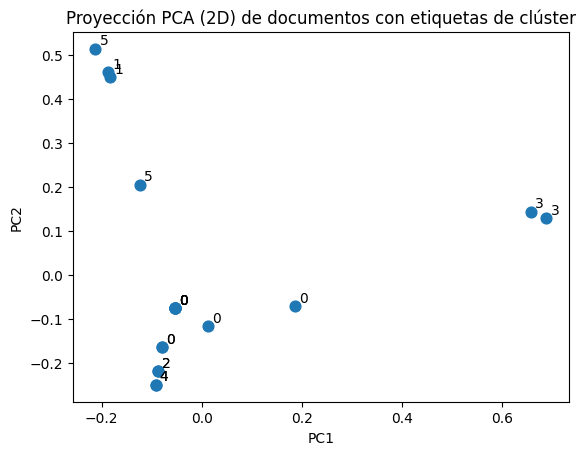

In [ ]:

pca = PCA(n_components=2, random_state=42)
coords_2d = pca.fit_transform(X.toarray())
coords_df = pd.DataFrame({"x": coords_2d[:,0], "y": coords_2d[:,1], "cluster": clusters, "titulo": titles})

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(coords_df["x"], coords_df["y"], s=60)  # sin especificar colores (requisito)
for i, row in coords_df.iterrows():
    plt.annotate(str(int(row["cluster"])), (row["x"], row["y"]), xytext=(3,3), textcoords="offset points")
plt.title("Proyección PCA (2D) de documentos con etiquetas de clúster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



## 7) Términos representativos por clúster
Sirven para nombrar rápidamente cada clúster.


In [ ]:

def top_terms_per_cluster(X, labels, vectorizer, top_n=6):
    X_dense = X.toarray()
    terms = np.array(vectorizer.get_feature_names_out())
    rows = []
    for c in sorted(set(labels)):
        mask = labels == c
        mean_vec = X_dense[mask].mean(axis=0)
        top_idx = np.argsort(-mean_vec)[:top_n]
        rows.append({"cluster": c, "top_terms": ", ".join(terms[top_idx])})
    return pd.DataFrame(rows)

top_terms_per_cluster(X, clusters, vectorizer, top_n=6)


,cluster,top_terms
0,0,"incidentes, aumento, respuesta, ritmo, claves ..."
1,1,"modelos, optimización modelos, nuevo, optimiza..."
2,2,"servicios, serverless, serverless contenedores..."
3,3,"transición energética, transición, energética,..."
4,4,"mejoran, aula, mejoran comprensión, inmersivas..."
5,5,"mejorar, smartphone integra, modelos inteligen..."



## 8) Pruebas rápidas de búsqueda


In [ ]:

for q in [
    "ataques cibernéticos y ransomware",
    "fútbol final táctica presión alta",
    "salud cardiovascular y dieta",
    "serverless contenedores observabilidad",
    "energía solar y cambio climático"
]:
    print("\nConsulta:", q)
    display(semantic_search(q, top_k=3))



Consulta: ataques cibernéticos y ransomware


,rank,score,titulo,texto
0,1,0.0,Calentamiento global acelera el derretimiento ...,El aumento de la temperatura global está provo...
1,2,0.0,Nuevas políticas climáticas en la Unión Europea,La UE anuncia políticas de reducción de emisio...
2,3,0.0,Energía solar supera récords de producción,La capacidad instalada de paneles solares crec...



Consulta: fútbol final táctica presión alta


,rank,score,titulo,texto
0,1,0.4804,Análisis táctico del partido de semifinal,La presión alta y el contraataque fueron clave...
1,2,0.0000,Calentamiento global acelera el derretimiento ...,El aumento de la temperatura global está provo...
2,3,0.0000,Energía solar supera récords de producción,La capacidad instalada de paneles solares crec...



Consulta: salud cardiovascular y dieta


,rank,score,titulo,texto
0,1,0.2425,Estudio sobre dieta mediterránea y salud cardi...,La dieta mediterránea se asocia a menor riesgo...
1,2,0.0000,Calentamiento global acelera el derretimiento ...,El aumento de la temperatura global está provo...
2,3,0.0000,Energía solar supera récords de producción,La capacidad instalada de paneles solares crec...



Consulta: serverless contenedores observabilidad


,rank,score,titulo,texto
0,1,0.6257,Tendencias en computación en la nube,"Crecen los servicios serverless, contenedores ..."
1,2,0.0000,Calentamiento global acelera el derretimiento ...,El aumento de la temperatura global está provo...
2,3,0.0000,Energía solar supera récords de producción,La capacidad instalada de paneles solares crec...



Consulta: energía solar y cambio climático


,rank,score,titulo,texto
0,1,0.0,Calentamiento global acelera el derretimiento ...,El aumento de la temperatura global está provo...
1,2,0.0,Nuevas políticas climáticas en la Unión Europea,La UE anuncia políticas de reducción de emisio...
2,3,0.0,Energía solar supera récords de producción,La capacidad instalada de paneles solares crec...



---

##  Reto para la audiencia




Cual es el documento más representativo de cada clúster ¿los títulos que aparecen como 'medoid_title' representan bien el tema de cada clúster?"

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

def medoid_titles_per_cluster(X, labels, titles):
    X_dense = X.toarray()
    out = []
    for c in sorted(set(labels)):
        mask = labels == c
        Xc = X_dense[mask]
        centroid = Xc.mean(axis=0, keepdims=True)
        sims = cosine_similarity(Xc, centroid).ravel()
        best_local_idx = int(np.argmax(sims))
        global_idxs = np.where(labels == c)[0]
        best_global_idx = int(global_idxs[best_local_idx])
        out.append({
            "cluster": int(c),
            "medoid_title": titles[best_global_idx],
            "similarity_to_center": float(sims[best_local_idx])
        })
    return pd.DataFrame(out).sort_values("cluster")

display(medoid_titles_per_cluster(X, clusters, titles))


,cluster,medoid_title,similarity_to_center
0,0,Calentamiento global acelera el derretimiento ...,0.328065
1,1,Lanzamiento de framework de aprendizaje automá...,0.723286
2,2,Tendencias en computación en la nube,0.725531
3,3,Nuevas políticas climáticas en la Unión Europea,0.753880
4,4,Robótica colaborativa en fábricas,0.726722
5,5,Nuevo teléfono con cámara avanzada y IA,0.722507


**CLUSTERS**

- **Robótica industrial [ ] **
- **Computación en la nube [ ] **
- **Dispositivos inteligentes [ ] **
- **Medio ambiente [ ] **
- **Políticas climáticas [ ] **
- **Aprendizaje automático [ ] **



# RESPUESTAS

## Respuesta al reto: documento más representativo (medoide)

Los títulos seleccionados como *medoid_title* son los más cercanos al centro semántico de cada clúster, es decir, los que mejor **resumen el tema dominante**:

- **Cluster 0 - Medio ambiente:** *Calentamiento global acelera el derretimiento …*  
- **Cluster 1 - Aprendizaje automático:** *Lanzamiento de framework de aprendizaje automático*  
- **Cluster 2 - Computación en la nube:** *Tendencias en computación en la nube*  
- **Cluster 3 - Políticas climáticas:** *Nuevas políticas climáticas en la Unión Europea*  
- **Cluster 4 - Robótica industrial:** *Robótica colaborativa en fábricas*  
- **Cluster 5 - Dispositivos inteligentes:** *Nuevo teléfono con cámara avanzada y IA*  

los medoides funcionan como “etiquetas naturales” de cada grupo, ya que representan bien el tema central y ayudan a comprender rápidamente la estructura del dataset.  
